In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rc
rc('text', usetex=True)
plt.style.use('ggplot')
plt.rcParams.update({'axes.labelsize':16})
plt.rcParams.update({'axes.titlesize':16})
plt.rcParams.update({'legend.fontsize':16})
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['lines.linewidth'] = 4
from scipy.stats import weibull_min, chi2
import os
os.chdir('../')
from python_code import weibull_mle
import matplotlib as mpl
from tqdm import tqdm

In [2]:
lam_k_true = np.array([.5, 2])
dist = weibull_min(c=lam_k_true[1], scale=lam_k_true[0])
x = np.linspace(dist.ppf(.0001), dist.ppf(.9999), 100)

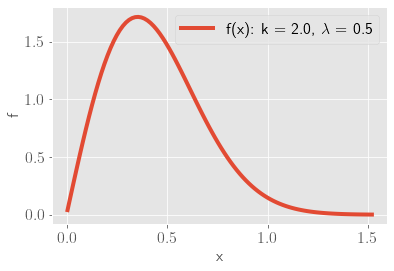

In [3]:
plt.plot(x, dist.pdf(x), label=fr'f(x):  k = {lam_k_true[1]}, $\lambda$ = {lam_k_true[0]}')
plt.xlabel('x')
plt.ylabel('f')
plt.legend();

In [4]:
n_points = 1000
statistics = np.zeros(n_points)
mle_params = np.zeros((n_points, 2))
for it in tqdm(range(n_points)):
    samples = dist.rvs(5000)
    opt = weibull_mle.WeibullMle(data=samples, max_iter=5000, init_params=[10, 10])
    lam_k_mle = opt.fit()[:-1]
    J = -opt.calculate_hessian(*lam_k_mle)
    mle_params[it] = lam_k_mle
    statistics[it] = (lam_k_mle - lam_k_true).T@J@(lam_k_mle - lam_k_true)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:27<00:00, 36.78it/s]


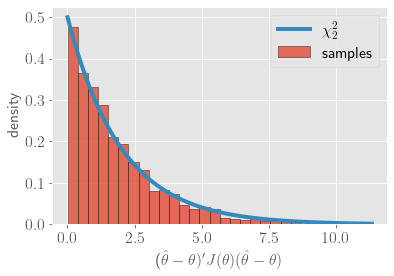

In [5]:
plt.hist(statistics, edgecolor='black', alpha=.8, bins=30, density=True, label='samples')
x = np.linspace(statistics.min(), statistics.max(), 100)
plt.plot(x, chi2(2).pdf(x), label='$\chi^2_2$')
plt.legend()
plt.xlabel(r"($\hat{\theta} -\theta)'J(\theta)(\hat{\theta} -\theta)$")
plt.ylabel('density')
plt.savefig('figures/convergence_1.png', dpi=300, bbox_inches='tight');

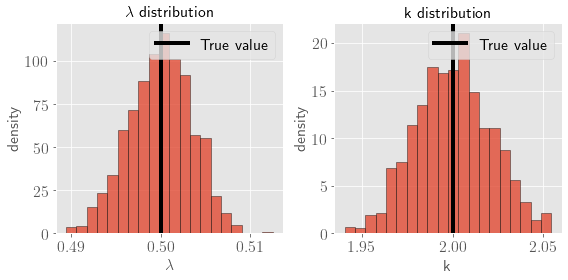

In [6]:
fig, ax = plt.subplots(ncols=2, figsize=(8, 4))
ax[0].hist(mle_params[:, 0], edgecolor='black', alpha=.8, bins=20, density=True)
ax[0].set_title('$\lambda$ distribution')
ax[1].hist(mle_params[:, 1], edgecolor='black', alpha=.8, bins=20, density=True)
ax[1].set_title('k distribution')
ax[0].set_xlabel('$\lambda$')
ax[1].set_xlabel('k')      
ax[0].axvline(x=lam_k_true[0], color='black', label='True value')
ax[1].axvline(x=lam_k_true[1], color='black', label='True value')
[ax.legend() for ax in ax];
[ax.set_ylabel('density') for ax in ax];
fig.tight_layout()
plt.savefig('figures/convergence_params.png', dpi=300, bbox_inches='tight');

In [7]:
n_points = 1000
W_vals = np.zeros(n_points)
for it in tqdm(range(n_points)):
    samples = dist.rvs(5000)
    opt = weibull_mle.WeibullMle(data=samples, max_iter=5000, init_params=[10, 10])
    output = opt.fit()
    lam_k_mle = output[:-1]
    log_like_mle = output[-1]
    log_like_true_params = opt.calculate_log_likelihood(*lam_k_true)
    W_vals[it] = 2*(log_like_mle-log_like_true_params)


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:26<00:00, 37.58it/s]


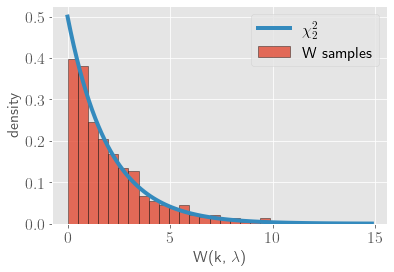

In [8]:
plt.hist(W_vals, edgecolor='black', alpha=.8, bins=30, density=True, label='W samples')
x = np.linspace(W_vals.min(), W_vals.max(), 100)
plt.plot(x, chi2(2).pdf(x), label='$\chi^2_2$')
plt.legend()
plt.xlabel('W(k, $\lambda$)')
plt.ylabel('density')
plt.savefig('figures/convergence_2.png', dpi=300, bbox_inches='tight');